In [1]:
# https://github.com/pmstangmailcom/rs_school/blob/main/EDA_data_exploration.ipynb
#     link submit


In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# import os
%matplotlib inline

In [3]:
passengers_before_cleaning = pd.read_csv('EDA_data_exploration_data.csv')
passengers_before_cleaning.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


# Context

The dataset contains ??????????????????? список пассажиров теплохода (парохода) "Titanic". В предложенном датасете собрана информация о самих пассажирах (признаки), а также о том, выжили они или нет (целевая переменная).
Labels to note:

PassengerId – id пассажира
Survived – погиб (0) или выжил (1)
Pclass – класс билета (первый (1), второй (2) или третий (3))
Name – имя пассажира
Sex – пол
Age – возраст
SibSp -  количество братьев и сестер или супругов на борту
Parch - количество родителей и детей на борту
Ticket – номер билета
Fare - стоимость билета
Cabin - номер каюты
Embarked – порт посадки (C – Шербур; Q – Квинстаун; S – Саутгемптон)


Сделать EDA

In [4]:
passengers_before_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PassengerId  100000 non-null  int64  
 1   Survived     100000 non-null  int64  
 2   Pclass       100000 non-null  int64  
 3   Name         100000 non-null  object 
 4   Sex          100000 non-null  object 
 5   Age          96708 non-null   float64
 6   SibSp        100000 non-null  int64  
 7   Parch        100000 non-null  int64  
 8   Ticket       95377 non-null   object 
 9   Fare         99866 non-null   float64
 10  Cabin        32134 non-null   object 
 11  Embarked     99750 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 9.2+ MB


Как мы видим, у нас 12 переменных. Одна из них (Survived) – зависимая (целевая), остальные – независимые (признаки).
Всего в датасете 100000 записей, при этом в нескольких переменных есть пропуски.
As we can see, there are a few columns with null values.

In [5]:
passengers_before_cleaning.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,100000.000000,100000.000000,100000.000000,96708.000000,100000.000000,100000.000000,99866.00000
mean,49999.500000,0.427740,2.106910,38.355472,0.397690,0.454560,43.92933
std,28867.657797,0.494753,0.837727,18.313556,0.862566,0.950076,69.58882
min,0.000000,0.000000,1.000000,0.080000,0.000000,0.000000,0.68000
25%,24999.750000,0.000000,1.000000,25.000000,0.000000,0.000000,10.04000
50%,49999.500000,0.000000,2.000000,39.000000,0.000000,0.000000,24.46000
75%,74999.250000,1.000000,3.000000,53.000000,1.000000,1.000000,33.50000
max,99999.000000,1.000000,3.000000,87.000000,8.000000,9.000000,744.66000


# Data quality assessment

Посмотрим и удалим дубликаты

In [6]:
passengers_before_cleaning.shape

(100000, 12)

In [7]:
passengers_before_cleaning.drop_duplicates()
passengers_before_cleaning.shape


(100000, 12)

Мы видим, дубликатов нет

Обработка пропусков. 
Тепловая карта пропущенных значений

<AxesSubplot:>

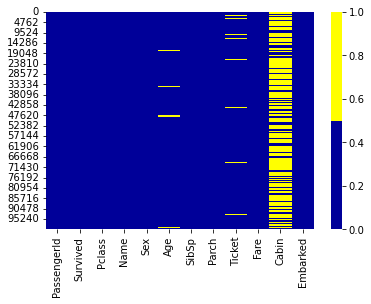

In [8]:

colours = ['#000099', '#ffff00'] # yellow - NaN, blue - not NaN
sns.heatmap(passengers_before_cleaning.isnull(), cmap=sns.color_palette(colours))

We see feature 'Cabin' has a lot of NaN's. Уточним количество пропуском в процентном соотношении

In [9]:
passengers_before_cleaning.isnull().mean()*100


PassengerId     0.000
Survived        0.000
Pclass          0.000
Name            0.000
Sex             0.000
Age             3.292
SibSp           0.000
Parch           0.000
Ticket          4.623
Fare            0.134
Cabin          67.866
Embarked        0.250
dtype: float64

Пропуски в Cabin составляют почти 70%, этим признаком можно пренебречь
?????????!!!!!!!!!!!!!!!!!!! Удалить столбец!!!!! или не надо??????????

Удалить строки с Nan в столбцах 'Embarked', 'Fare', это 0.384% от всех значений, и эти признаки не очень информативны

In [10]:
# null_values = pd.isnull(passenger_data[['Age', 'Ticket', 'Fare', 'Embarked']]).value_counts()
# null_values
passengers = passengers_before_cleaning.dropna(subset=['Embarked', 'Fare'])
passengers.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


Age заменим средним значением

In [11]:
age_mean = passengers['Age'].mean()
passengers['Age'].fillna(value=age_mean, inplace=True)


C:\Users\churi\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


Replace all NaN's of the column 'Ticket' with 'no ticket number' . Replace all NaN's of the column 'Cabin' with 'no cabin number'

In [12]:

passengers.fillna({'Ticket': 'no ticket number', 'Cabin': 'no cabin number'}, inplace=True)
passengers.head()

# df[1].fillna(0, inplace=True)
# df.fillna({1:0}, inplace=True)
# replacement= {'column_A': 0, 'column_B': -999, 'column_C': -99999}  df.fillna(value=replacement)
# df.loc[df['column_name'].isnull(), 'column_name'] = 0

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,38.352635,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,38.352635,0,0,27323,13.35,no cabin number,S
2,2,0,3,"Owens, Kenneth",male,0.330000,1,2,CA 457703,71.29,no cabin number,S
3,3,0,3,"Kramer, James",male,19.000000,0,0,A. 10866,13.04,no cabin number,S
4,4,1,3,"Bond, Michael",male,25.000000,0,0,427635,7.76,no cabin number,S


In [13]:
passengers.isnull().mean()*100

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Cabin          0.0
Embarked       0.0
dtype: float64

Now we don't have any NAN's


Обработаем категориальные признаки. 

In [14]:

passengers['Sex'].value_counts()


male      55920
female    43697
Name: Sex, dtype: int64

S    72047
C    22154
Q     5416
Name: Embarked, dtype: int64

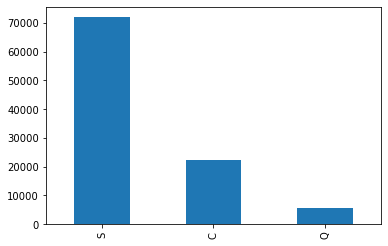

In [15]:
passengers['Embarked'].value_counts().plot.bar()
passengers['Embarked'].value_counts()

Нас интересуют столбцы:
    Sex (принимает два варианта значений, распределение значений примерно одинаковое, что делает этот признак информативным), Embarked (три варианта).
Признаки Name, Ticket, Cabin не меняем

Используем One Hot Encoding

In [17]:
pd.get_dummies(passengers, columns=['Sex', 'Embarked']).head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,1,1,"Oconnor, Frankie",38.352635,2,0,209245,27.14,C12239,0,1,0,0,1
1,1,0,3,"Bryan, Drew",38.352635,0,0,27323,13.35,no cabin number,0,1,0,0,1
2,2,0,3,"Owens, Kenneth",0.330000,1,2,CA 457703,71.29,no cabin number,0,1,0,0,1
3,3,0,3,"Kramer, James",19.000000,0,0,A. 10866,13.04,no cabin number,0,1,0,0,1
4,4,1,3,"Bond, Michael",25.000000,0,0,427635,7.76,no cabin number,0,1,0,0,1


Проанализируем выбросы.

столбец 'Survived' должен принимать значение 1 или 2, Pclass - значение 1, 2, 3. Проверим это

In [18]:
passengers['Survived'].value_counts()

0    57025
1    42592
Name: Survived, dtype: int64

In [19]:
passengers['Pclass'].value_counts()

3    40860
1    30189
2    28568
Name: Pclass, dtype: int64

Так же мы видим, что значения целевой переменной распределены примерно поровну, что делает ее хорошей переменной для использования в ??????????????????? в будущем

Для численных признаков построим гисторгамму или boxplot

In [20]:
# passengers['Age'].hist(bins=100)
# passengers.boxplot(column=['Age'])

passengers['Age'].describe()

count    99617.000000
mean        38.352635
std         18.010100
min          0.080000
25%         25.000000
50%         38.352635
75%         53.000000
max         87.000000
Name: Age, dtype: float64

Мы видим, что возраст меняется от 0,08 до 87 лет, что может соответствовать действительности

Анализируем наличие выбросов стоимость билета для разных классов

# Data exploration

<AxesSubplot:>

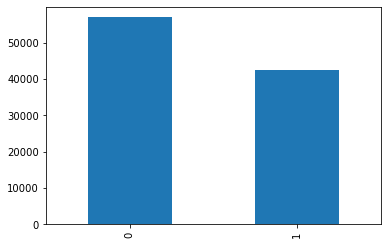

In [21]:
passengers['Survived'].value_counts().plot.bar()


Целевая переменная 'Survived' хорошая, т.к.распределение примерно 50 на 50 

<AxesSubplot:>

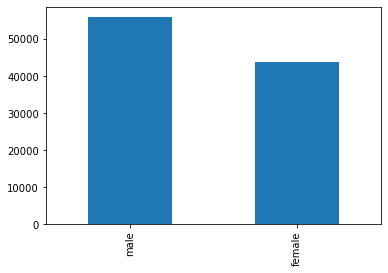

In [23]:
passengers['Sex'].value_counts().plot.bar()

Признак 'Sex' является существенным признаком, т.к. распределение примерно 50 на 50

<AxesSubplot:>

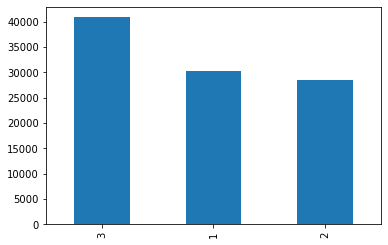

In [24]:
passengers['Pclass'].value_counts().plot.bar()

Признак 'Pclass' является существенным признаком, т.к. распределение примерно равномерное

# Summary

1. Целевая переменная 'Survived' хорошая, т.к.распределение примерно 50 на 50 ??????????где я это написала
2. Признак 'Sex' является существенным признаком, т.к. распределение примерно 50 на 50
3. Признак 'Pclass' является существенным признаком, т.к. распределение примерно равномерное
